# Bank Customer Segmentation

## 📌 Objective
Segment credit card customers based on financial and behavioral data to help marketing and risk teams personalize their strategies.


## Load Data & Initial Exploration

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nares\Downloads\archive\CC GENERAL.csv")

print(f"null values {df.isnull().sum()} in dataset")

## Data Preprocessing

In [ ]:
df_clean = df.drop('CUST_ID', axis=1)

from fancyimpute import IterativeImputer  # fancyimpute uses EM-style iterations

imputer = IterativeImputer()  # or IterativeSVD, SoftImpute, etc.
df_imputed = imputer.fit_transform(df_clean)

data = pd.DataFrame(df_imputed,columns=df_clean.columns)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

## Correlation Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## KMeans Clustering and Elbow Method

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(df_scaled)

## PCA and Cluster Visualization

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
data['PC1'] = components[:, 0]
data['PC2'] = components[:, 1]

sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('Customer Segments via PCA')
plt.show()

## Cluster Summary

null values CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64 in dataset


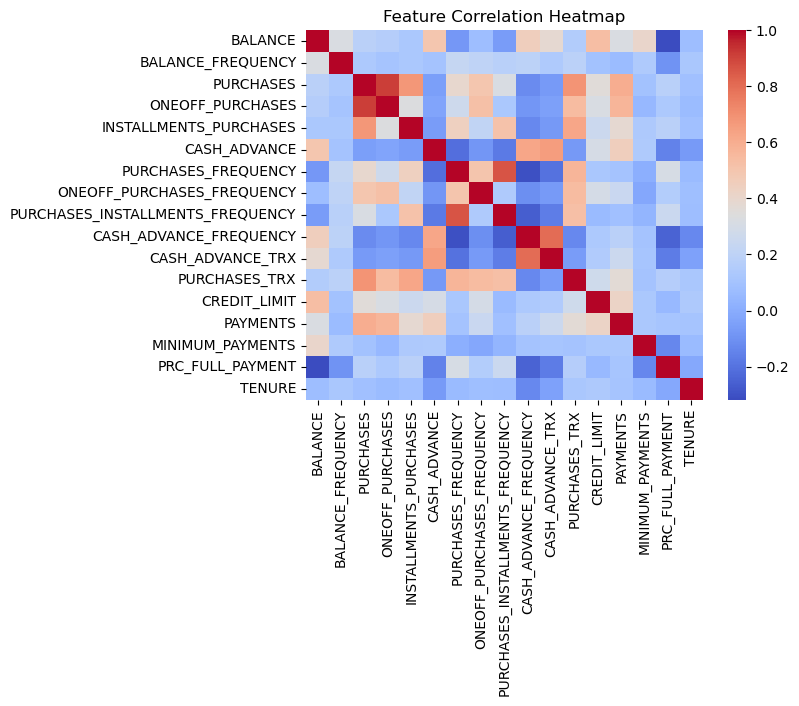

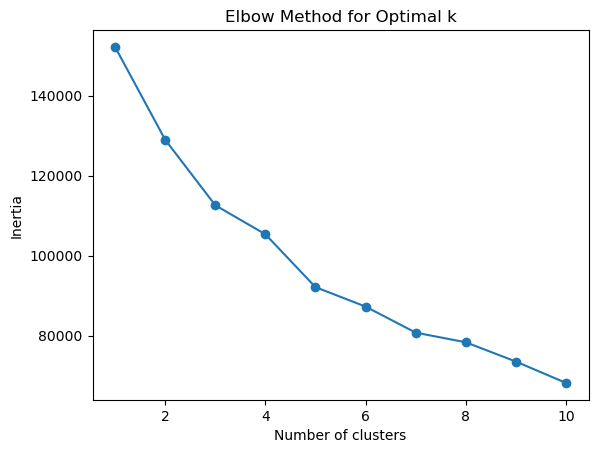

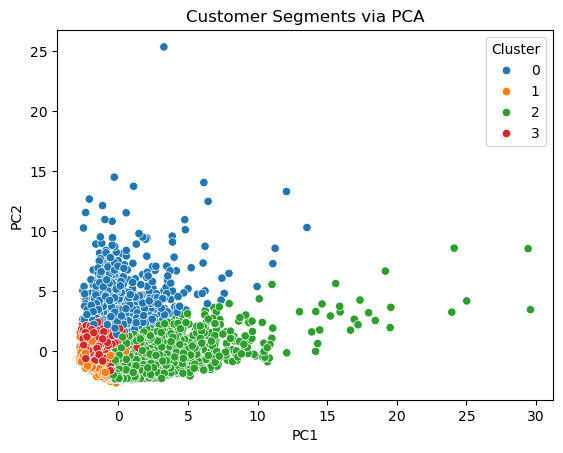

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     TENURE
Cluster                                                                 
0        5012.751560   715.208795   5061.739284   8207.308014  11.417773
1         107.793932   349.721611    297.817582   3635.696711  11.219003
2        1255.335965  2182.466619    234.706913   5122.389860  11.729487
3        1490.333093   282.212988    781.469212   3210.949411  11.481140


In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'TENURE']])

# Decision and Interpretation